In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [109]:
df = pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/heart_disease.csv")
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [110]:
df.drop('Unnamed: 0' ,axis =1,inplace = True )
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [111]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [112]:
df.drop('target',axis=1).corrwith(df.target)


age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
dtype: float64

In [113]:
#features correlation with label

# visualize the correlation

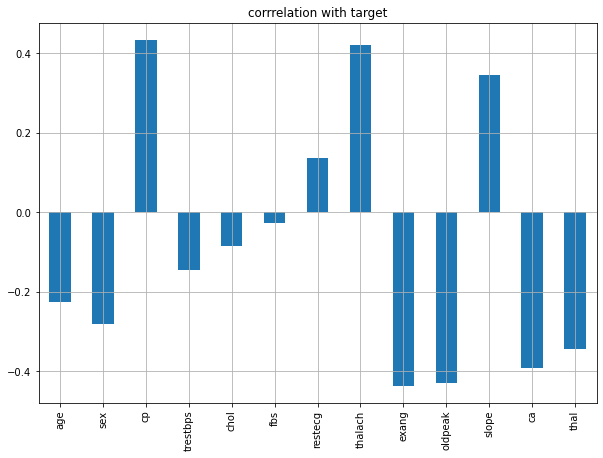

In [114]:
df.drop('target',axis=1).corrwith(df.target).plot(kind='bar',
            grid=True, figsize=(10,7),title="corrrelation with target")

plt.show()


In [115]:
##Model building usong SelectPercentile features

In [116]:
from sklearn.feature_selection import SelectPercentile,chi2

#when we apply chi2 we get palues for all features.Based on p-values it will select 80% of features

#Eg: if pvalues<0.05 it will reject null hypothesis.Default null hypothesis is,there is no relation b/w feature and label


In [117]:
#instantiate SelectPercentile and fit


In [118]:
X=df.drop(['target'],axis=1)
y= df.target

In [119]:
SPercentile = SelectPercentile(score_func=chi2,percentile=80)  #65,70,...85 CAN BE TRIED

In [120]:
SPercentile = SPercentile.fit(X,y)

In [121]:
#seperate the features to check p values
col_nos =  SPercentile.get_support(indices =True) 
print('Feature index = ',col_nos )


Feature index =  [ 0  1  2  3  4  7  8  9 10 11]


In [122]:
features=X.columns[col_nos]
print('features=',features)


features= Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca'],
      dtype='object')


In [123]:
features=X.columns[col_nos]
print('features=',list(features))


features= ['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'slope', 'ca']


In [124]:
df_scores = pd.DataFrame({'feature':X.columns, 'chi2Score': SPercentile.scores_  , 
                            'value' : SPercentile.pvalues_})


In [125]:
df_scores.sort_values(by='chi2Score',ascending=False)

,feature,chi2Score,value
7,thalach,188.320472,7.395102e-43
9,oldpeak,72.644253,1.552583e-17
11,ca,66.440765,3.605677e-16
2,cp,62.598098,2.534982e-15
8,exang,38.914377,4.428074e-10
4,chol,23.936394,9.957148e-07
0,age,23.286624,1.395673e-06
3,trestbps,14.823925,1.180286e-04
10,slope,9.804095,1.741237e-03
1,sex,7.576835,5.912318e-03


In [126]:
#create subset to select updated features

X= df[features]

y= df.target

In [127]:
#import library 


from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler

In [128]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

In [129]:
X_scaler

array([[ 0.9521966 ,  0.68100522,  1.97312292, ...,  1.08733806,
        -2.27457861, -0.71442887],
       [-1.91531289,  0.68100522,  1.00257707, ...,  2.12257273,
        -2.27457861, -0.71442887],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.31091206,
         0.97635214, -0.71442887],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ...,  2.03630317,
        -0.64911323,  1.24459328],
       [ 0.29046364,  0.68100522, -0.93851463, ...,  0.13837295,
        -0.64911323,  0.26508221],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.89686172,
        -0.64911323,  0.26508221]])

In [130]:
x_train,x_test,y_train,y_test = train_test_split(X_scaler,y,test_size=0.3, random_state =42)


# GrandientBoostingClassifier

In [131]:
from sklearn.ensemble import GradientBoostingClassifier 

In [132]:
from sklearn.metrics import classification_report,accuracy_score

In [133]:
def metric_score (clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred = clf.predict(x_train)	
        print('accuracy score: {accuracy_score(y_train,y_pred) *100:.2f}%')
        print('accuracy score:',round(accuracy_score(y_train,y_pred)*100,2))
    elif train==False :
        pred = clf.predict(x_test)
        print("accuracy score: {accuracy_score(y_test,pred) *100:.2}%")
        print('accuracy score:',round(accuracy_score(y_test,pred) *100,2))
        print('\n\n Classification Report \n' ,classification_report(y_test,pred,digits=2))
        


In [134]:
#initiate GradientBoostingClassifier

gbdt_clf= GradientBoostingClassifier()

gbdt_clf.fit(x_train,y_train)


GradientBoostingClassifier()

In [135]:
#calling the fn
metric_score(gbdt_clf,x_train,x_test,y_train,y_test,train=True)
metric_score(gbdt_clf,x_train,x_test,y_train,y_test,train=False)


accuracy score: {accuracy_score(y_train,y_pred) *100:.2f}%
accuracy score: 100.0
accuracy score: {accuracy_score(y_test,pred) *100:.2}%
accuracy score: 83.52


 Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        41
           1       0.86      0.84      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



In [136]:
#lets try if we can improve the performance our model using paraeter tuning
from sklearn.model_selection import GridSearchCV
grid_param = {
            'max_depth': range(4,8),
            'min_samples_split' : range(2,10,2) ,
            'learning_rate' : np.arange(0.1,0.4)
            }


In [137]:
grid = GridSearchCV(GradientBoostingClassifier(),param_grid = grid_param)


In [138]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(4, 8),
                         'min_samples_split': range(2, 10, 2)})

In [139]:
#calling the fn
metric_score(gbdt_clf,x_train,x_test,y_train,y_test,train=True)
metric_score(gbdt_clf,x_train,x_test,y_train,y_test,train=False)


accuracy score: {accuracy_score(y_train,y_pred) *100:.2f}%
accuracy score: 100.0
accuracy score: {accuracy_score(y_test,pred) *100:.2}%
accuracy score: 83.52


 Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        41
           1       0.86      0.84      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



In [140]:
#we can increase the performance with diff range 

##XGboost  @50 min makenotes

# VEHICLE data

In [189]:
#1hr6min


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [190]:
#preprocessing
from sklearn.metrics import r2_score,mean_squared_error
! python -m pip install xgboost

In [191]:
#mertrics and models
from sklearn.model_selection import train_test_split,GridSearchCV
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [192]:
df = pd.read_csv(r'C:\Users\315ra\OneDrive\Desktop\notes\notes-main\vehicles_data_students.csv')

In [193]:
df.head(1)

,Unnamed: 0,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,county,state,lat,long
0,55483,7315914053,0,2018.0,ram,promaster 2500,excellent,NaN,gas,44244.0,clean,automatic,NaN,NaN,van,NaN,NaN,ca,32.7928,-116.9665


In [194]:
df.shape

(64032, 20)

In [195]:
drop_columns =['Unnamed: 0','id','size','lat','long','county','type']
df = df.drop(columns = drop_columns,axis =1)

df.shape

(64032, 13)

In [196]:
df.isna().sum()
df.head(1)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,paint_color,state
0,0,2018.0,ram,promaster 2500,excellent,NaN,gas,44244.0,clean,automatic,NaN,NaN,ca


In [197]:
df = df.dropna()      #to frop all null values
df.head(1)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,paint_color,state
5,0,2006.0,chrysler,300,like new,8 cylinders,gas,149000.0,clean,automatic,rwd,white,fl


In [198]:
df.shape

(18828, 13)

In [199]:
df.describe()

,price,year,odometer
count,1.882800e+04,18828.000000,1.882800e+04
mean,1.614425e+04,2009.338910,1.135402e+05
std,1.248295e+05,9.751838,2.126508e+05
min,0.000000e+00,1918.000000,0.000000e+00
25%,5.500000e+03,2006.000000,5.700000e+04
50%,1.079650e+04,2011.000000,1.040000e+05
75%,2.199500e+04,2015.000000,1.490550e+05
max,1.700000e+07,2022.000000,1.000000e+07


# lets check if we have any duplicates and remove if we have
#if there were duplicates the model will learn that particular pattern


In [200]:
df.drop_duplicates(inplace = True)

df.shape

(17649, 13)

# filter categorical features


In [201]:
numerics = ['int8','int16','int32','int64','float16','float32','float64']
categorical_col = []


In [202]:
features = df.columns.values
features

array(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive',
       'paint_color', 'state'], dtype=object)

In [203]:
features = df.columns.values.tolist()
features

['price',
 'year',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'drive',
 'paint_color',
 'state']

In [204]:
for col in features:
    if df[col].dtype in numerics:
        continue
    categorical_col.append(col)
#to skip when we have numerical data and add to empty list

In [205]:
#1hr 34========================

categorical_col

['manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'paint_color',
 'state']

In [206]:
#Encoding Categorical columns using get dummies(also we can use ohe as well)(label might make it biased )

In [207]:
df_dummies = pd.get_dummies(df[categorical_col],drop_first = True)

In [208]:
df_dummies.head()


,manufacturer_alfa-romeo,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,manufacturer_ferrari,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
5,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [209]:
df = df.join(df_dummies)
#joining the encoded data with our data set

In [210]:
df.shape

(17649, 4492)

In [211]:
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
5,0,2006.0,chrysler,300,like new,8 cylinders,gas,149000.0,clean,automatic,...,0,0,0,0,0,0,0,0,0,0
9,20995,2011.0,chevrolet,silverado 1500,excellent,8 cylinders,gas,92001.0,clean,automatic,...,0,0,0,0,0,0,0,1,0,0
15,50995,2017.0,gmc,yukon denali,like new,8 cylinders,gas,70227.0,clean,automatic,...,0,0,0,0,0,0,0,0,0,0
22,13500,2014.0,chevrolet,tahoe,good,8 cylinders,gas,96007.0,clean,automatic,...,0,0,0,0,0,0,0,0,0,0
29,34990,2016.0,gmc,canyon crew cab sle pickup,good,6 cylinders,gas,34425.0,clean,other,...,0,0,0,0,0,0,0,0,0,0


In [212]:
#1 hr 40
df.drop(columns=categorical_col,axis=1,inplace=True)


In [213]:
df.head(2)
#try other encoding techniques as well compare the accuracy


,price,year,odometer,manufacturer_alfa-romeo,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
5,0,2006.0,149000.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,20995,2011.0,92001.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


# selecting realistic data >here domain knowledge will help

In [214]:
df = df[df['price']>1000]

df = df[df['price']<40000]

In [215]:
df.head(1)


,price,year,odometer,manufacturer_alfa-romeo,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
9,20995,2011.0,92001.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [216]:
#Divide the datasets into

In [217]:
y = df['price']

X= df.drop(['price'],axis =1)

In [218]:
#check 1hr 47 if u have error
x_train,x_test,y_train,y_test = train_test_split( X,y,test_size=0.25,random_state=10)


In [219]:
xgb = xgb.XGBRegressor()
#or we can import the XGBRegressor directlt by using from xgboost import XGBRegressor as well


In [220]:
xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)

In [221]:
xgb.fit(x_train,y_train)

y_pred = xgb.predict(x_test)
r2_score(y_test,y_pred)


0.8527367159408741

In [222]:
#tune the parameter and check if we can inc score(use either grid search or randomized search )

#make note of comparison b/w baggging and boosting

In [ ]:
##how to deal with imbalanced data sets
